# Data Augmentation이 필요한 class 분석
## 각 class별 IoU 시각화

In [ ]:
iou_dict = {
    "road": 0.7797,
    "sidewalk": 0.9569,
    "road roughness": 0.7903,
    "road boundaries": 0.6969,
    "crosswalks": 0.7379,
    "lane": 0.9496,
    "road color guide": 0.7650,
    "road marking": 0.8789,
    "parking": 0.7659,
    "traffic sign": 0.7228,
    "traffic light": 0.6922,
    "pole/structural object": 0.7121,
    "building": 0.8328,
    "tunnel": 0.9085,
    "bridge": 0.9861,
    "pedestrian": 0.8264,
    "vehicle": 0.8059,
    "bicycle": 0.9384,
    "motorcycle": 0.4256,
    "personal mobility": 0.4034,
    "dynamic": 0.8992,
    "vegetation": 0.5943,
    "sky": 0.9087,
    "static": 0.9844
}

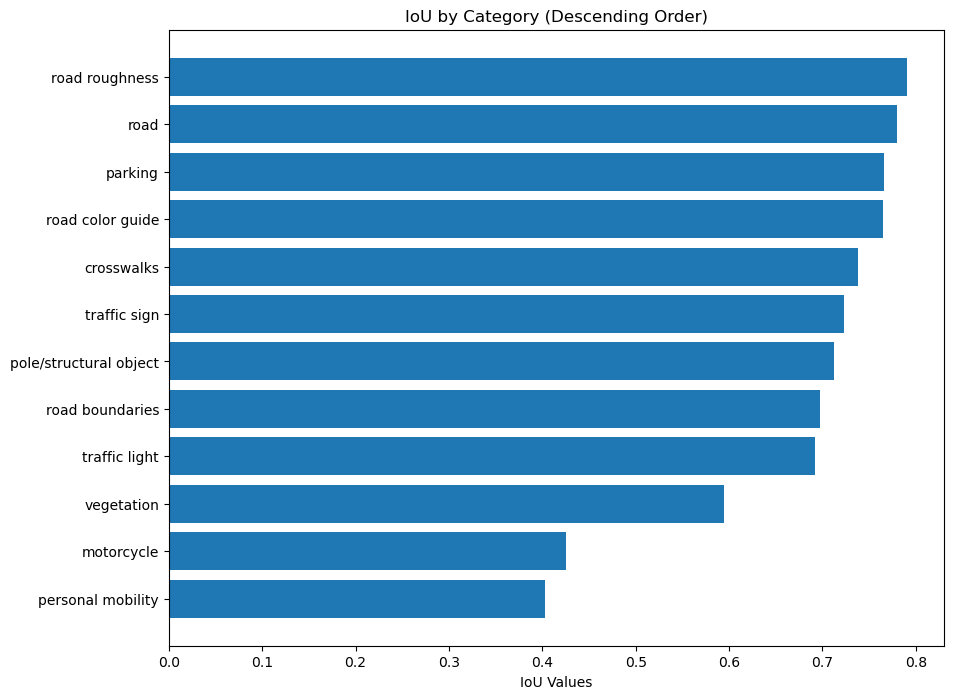

In [ ]:
# 주어진 딕셔너리를 value에 대해 내림차순으로 정렬
sorted_iou_dict = dict(sorted(iou_dict.items(), key=lambda item: item[1], reverse=True))

# key와 value를 각각 리스트로 분리
categories = list(sorted_iou_dict.keys())
iou_values = list(sorted_iou_dict.values())
categories1 = []
iou_values1 = []
for i in range(24):
    if iou_values[i] < 0.7915:
        iou_values1.append(iou_values[i])
        categories1.append(categories[i])

# 바 차트 시각화
plt.figure(figsize=(10, 8))
plt.barh(categories1, iou_values1)
plt.xlabel('IoU Values')
plt.title('IoU by Category (Descending Order)')
plt.gca().invert_yaxis()  # 카테고리 순서 반전 (값이 큰 것이 위로 오도록)
plt.show()

## class별 Acc 시각화

In [ ]:
acc_dict = {'road': 0.8700, 'sidewalk': 0.9761, 'road roughness': 0.8883, 'road boundaries': 0.7880, 'crosswalks': 0.8637,'lane': 0.9771,
            'road color guide': 0.8539, 'road marking': 0.9313, 'parking': 0.8700, 'traffic sign': 0.8133, 'traffic light': 0.7913,
            'pole/structural object': 0.8060, 'building': 0.9123, 'tunnel': 0.9571, 'bridge': 0.9921, 'pedestrian': 0.8757, 'vehicle': 0.9012,
            'bicycle': 0.9721, 'motorcycle': 0.4676, 'personal mobility': 0.4658, 'dynamic': 0.9750, 'vegetation': 0.7401, 'sky': 0.9551, 'static': 0.9915}

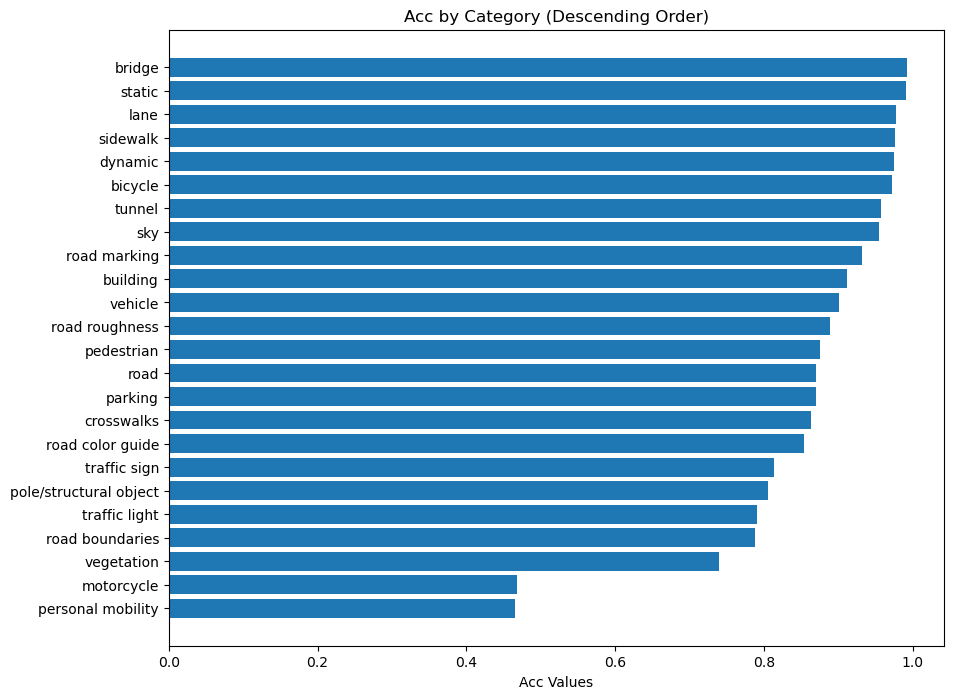

In [ ]:
# 주어진 딕셔너리를 value에 대해 내림차순으로 정렬
sorted_iou_dict = dict(sorted(acc_dict.items(), key=lambda item: item[1], reverse=True))

# key와 value를 각각 리스트로 분리
categories = list(sorted_iou_dict.keys())
iou_values = list(sorted_iou_dict.values())

# 바 차트 시각화
plt.figure(figsize=(10, 8))
plt.barh(categories, iou_values)
plt.xlabel('Acc Values')
plt.title('Acc by Category (Descending Order)')
plt.gca().invert_yaxis()  # 카테고리 순서 반전 (값이 큰 것이 위로 오도록)
plt.show()

- Dataframe에 내림차순으로 저장

In [ ]:
val_class_iou_df = pd.DataFrame(list(iou_dict.items()), columns=['class_name', 'iou']).sort_values(by='iou', ascending=False)
val_class_acc_df = pd.DataFrame(list(acc_dict.items()), columns=['class_name', 'acc']).sort_values(by='acc', ascending=False)

In [ ]:
val_class_iou_df

,class_name,iou
14,bridge,0.9861
23,static,0.9844
1,sidewalk,0.9569
5,lane,0.9496
17,bicycle,0.9384
22,sky,0.9087
13,tunnel,0.9085
20,dynamic,0.8992
7,road marking,0.8789
12,building,0.8328


In [ ]:
val_class_acc_df

# EDA 결과와 IoU, Acc 시각화
## 저장된 csv 파일 dataframe으로 불러오기

In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path1 = 'train_class_instance_df.csv'
csv_file_path2 = 'val_class_instance_df.csv'
csv_file_path3 = 'train_class_area_df.csv'
csv_file_path4 = 'val_class_area_df.csv'


# CSV 파일을 DataFrame으로 불러오기
train_class_instance_df = pd.read_csv(csv_file_path1)
val_class_instance_df = pd.read_csv(csv_file_path2)
train_class_area_df = pd.read_csv(csv_file_path3)
val_class_area_df = pd.read_csv(csv_file_path4)

## 각 dataframe에 정규화 수행하여 하나의 그래프로 시각화
- x축 : class명

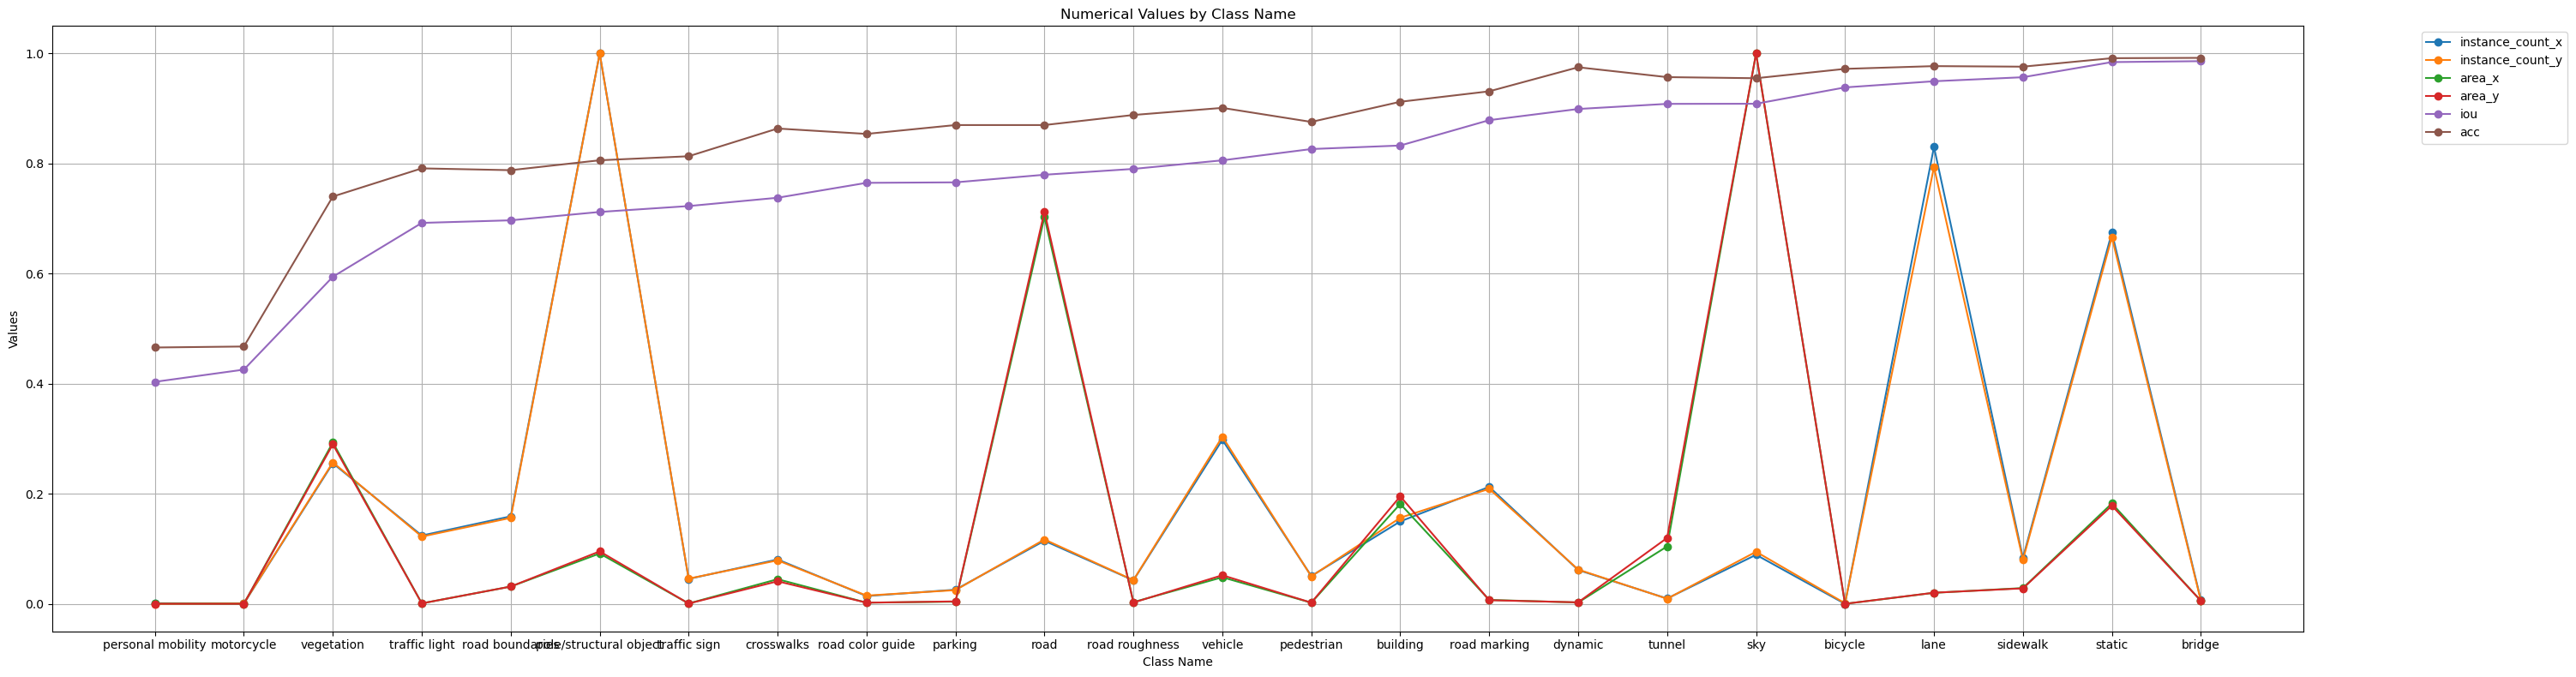

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_df(df):
    # 수치형 데이터만 선택
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # 수치형 데이터에 대해서만 정규화 수행
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return df

# 각 데이터프레임에 대해 정규화 수행 (iou, acc는 0~1사이의 값 가지므로 정규화 수행하지 않음)
train_class_instance_df_normalized = normalize_df(train_class_instance_df).sort_values(by='class_name')
val_class_instance_df_normalized = normalize_df(val_class_instance_df).sort_values(by='class_name')
train_class_area_df_normalized = normalize_df(train_class_area_df).sort_values(by='class_name')
val_class_area_df_normalized = normalize_df(val_class_area_df).sort_values(by='class_name')
#val_class_iou_df_normalized = normalize_df(val_class_iou_df).sort_values(by='class_name')
# val_class_acc_df_normalized = normalize_df(val_class_acc_df).sort_values(by='class_name')

# 데이터프레임 병합
df_merged = train_class_instance_df_normalized.merge(val_class_instance_df_normalized, on='class_name') \
    .merge(train_class_area_df_normalized, on='class_name') \
    .merge(val_class_area_df_normalized, on='class_name') \
    .merge(val_class_iou_df.sort_values(by='class_name'), on='class_name') \
    .merge(val_class_acc_df.sort_values(by='class_name'), on='class_name').sort_values(by='iou')

# 플롯 생성
plt.figure(figsize=(30, 8))


for column in df_merged.columns:
    if column != 'class_name':
        plt.plot(df_merged['class_name'], df_merged[column], marker='o', label=column)

plt.xlabel('Class Name')
plt.ylabel('Values')
plt.title('Numerical Values by Class Name')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()